In [1]:
#import require libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
#load data set
data = pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,43277.3
1,1.3,50825.5
2,1.5,41504.1
3,2.0,47877.5
4,2.2,43880.1
5,2.9,62306.2
6,3.0,66165.0
7,3.2,59889.5
8,3.2,70889.5
9,3.7,62907.9


In [3]:
#Separate label and feature 
X=data.iloc[:, 0].values
Y=data.iloc[:,-1].values

In [4]:
Y

array([ 43277.3,  50825.5,  41504.1,  47877.5,  43880.1,  62306.2,
        66165. ,  59889.5,  70889.5,  62907.9,  69539.8,  61373.4,
        62652.7,  62789.1,  67222.1,  74731.8,  72631.9,  91396.8,
        89499.3, 103334. , 100911.8, 108100.3, 111432.2, 125193.2,
       120374.1, 116140.2, 128665.9, 123898.5, 134630.1, 134059.2])

In [5]:
#check X data shape
X.shape

(30,)

In [6]:
#check X data shape
Y.shape

(30,)

In [7]:
# reshape x and y because they just have one feature
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [8]:
#split data set
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [9]:
#check X_Train data shape
X_Train.shape

(22, 1)

In [10]:
#check  X_Test data shape
X_Test.shape

(8, 1)

In [11]:
#model load
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor.fit(X_Train, Y_Train)

C:\Users\HARUNU~1\AppData\Local\Temp/ipykernel_11232/3746227380.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_Train, Y_Train)


RandomForestRegressor(n_estimators=500, random_state=0)

In [12]:
y_pred = regressor.predict(X_Test)

In [13]:
r2_score(Y_Test,y_pred)

0.9772815146384761

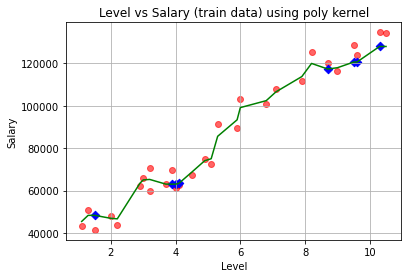

In [14]:
#visualize the fitted model and our data
plt.scatter(X,Y, color ='red', alpha=0.6)
plt.scatter(X_Test,y_pred,color = 'blue', marker='D')
plt.plot(X,regressor.predict(X),color='green')
plt.title('Level vs Salary (train data) using poly kernel')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.grid()
plt.show()